In [ ]:
import pandas as pd

df = pd.read_csv("../data/Cleanedsurvey.csv")
df.describe()

def categorize_age(age):
    if age < 18:
        return 0
    elif 18 <= age <= 21:
        return 1
    elif 22 <= age <= 25:
        return 2
    elif 26 <= age <= 30:
        return 3
    elif 31 <= age <= 60:
        return 4
    else:
        return 5
    
df['Age'] = df['Age'].apply(categorize_age)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1, 'Prefer not to say': 2, "Non-binary": 2})
def map_period(periods):
    period_mapping = {
        'Jan to Mar': 0,
        'Apr to Jun': 1,
        'Jul to Sept': 2,
        'Oct to Dec': 3
    }
    
    # If multiple periods are listed, take the highest numeric value
    period_values = [period_mapping[period.strip()] for period in periods.split(';')]
    return max(period_values)  # Return the highest period value (numerically)

# Apply the function to the 'Period' column to map to numeric values
df['Period'] = df['Period'].apply(map_period)
visit_mapping = {'Opening Time': 0, 'Early Afternoon': 1, 'Late Afternoon': 2, 'Evening': 3}
df['Visit'] = df['Visit'].map(visit_mapping)
frequency_mapping = {
    'More than 5 times a year': 0,
    '3 to 4 times a year': 1,
    '1 to 2 times a year': 2,
    'Once every 2 years': 3,
    'Once every 3 years': 4,
    'Once every 4 years': 5,
    'Once every 5 years': 6,
    'Less than once every 5 years': 7
}
df['Frequency'] = df['Frequency'].map(frequency_mapping)

rides_list = ['Roller Coasters', 'Ferris Wheels', 'Bumper Cars', 'Immersive Experiences', 
              'Dark rides', 'Haunted Houses', 'Carousels', 'Drop Towers', 'Pendulum rides (eg. Viking ride)', 
              'Eateries', 'Others']

pain_list = ['Long waiting times', 'Difficulty navigating the park', 'Poor crowd management', 
             'Lack of real time information about waiting times', 'Poor reception', 'Others']

for ride in rides_list:
    df[ride] = df['Rides'].apply(lambda x: 1 if ride in x else 0)
for pain in pain_list:
    df[pain] = df['Pain'].apply(lambda x: 1 if pain in x else 0)

df.head()

,Age,Gender,Period,Visit,Frequency,Rides,Pain,Occasion,Roller Coasters,Ferris Wheels,...,Carousels,Drop Towers,Pendulum rides (eg. Viking ride),Eateries,Others,Long waiting times,Difficulty navigating the park,Poor crowd management,Lack of real time information about waiting times,Poor reception
0,2,0,2,0,4,Roller Coasters;Immersive Experiences;Dark rides,Long waiting times;Difficulty navigating the park,Yes,1,0,...,0,0,0,0,0,1,1,0,0,0
1,1,0,2,0,3,Roller Coasters;Immersive Experiences;Pendulum...,Long waiting times;Difficulty navigating the p...,Yes,1,0,...,0,0,1,0,0,1,1,1,0,0
2,2,1,3,0,4,Roller Coasters;Immersive Experiences;Drop Towers,Long waiting times;Difficulty navigating the park,No,1,0,...,0,1,0,0,0,1,1,0,0,0
3,2,0,3,3,2,Roller Coasters;Bumper Cars;Haunted Houses,Long waiting times,Yes,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,3,0,2,Ferris Wheels;Bumper Cars;Carousels,Long waiting times;Poor crowd management;Lack ...,Yes,0,1,...,1,0,0,0,0,1,0,1,1,0


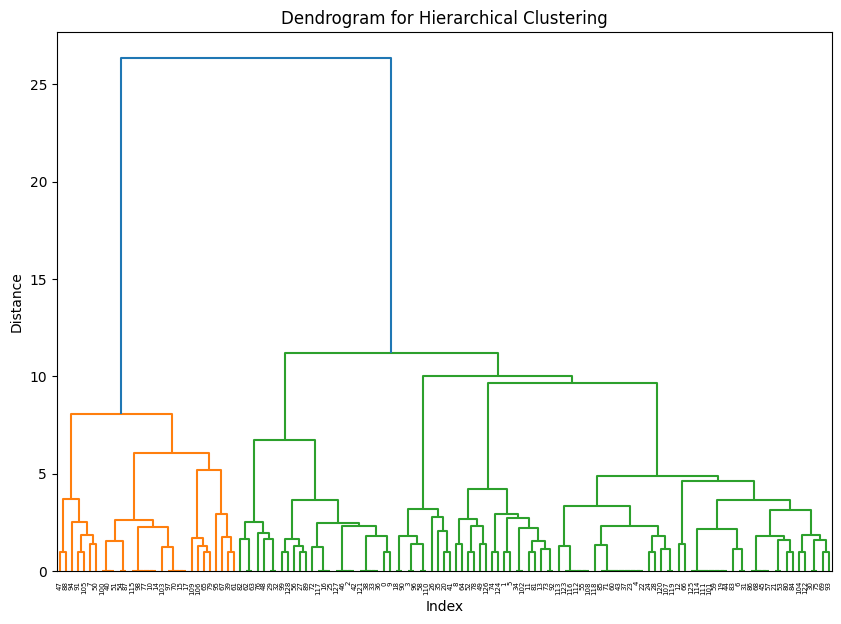

C:\Users\angsp\AppData\Local\Temp\ipykernel_3544\2242967002.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation['Cluster'] = hc.fit_predict(df_segmentation)
C:\Users\angsp\AppData\Local\Temp\ipykernel_3544\2242967002.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation['Cluster'] = hc.fit_predict(df_segmentation)
C:\Users\angsp\AppData\Local\Temp\ipykernel_3544\2242967002.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

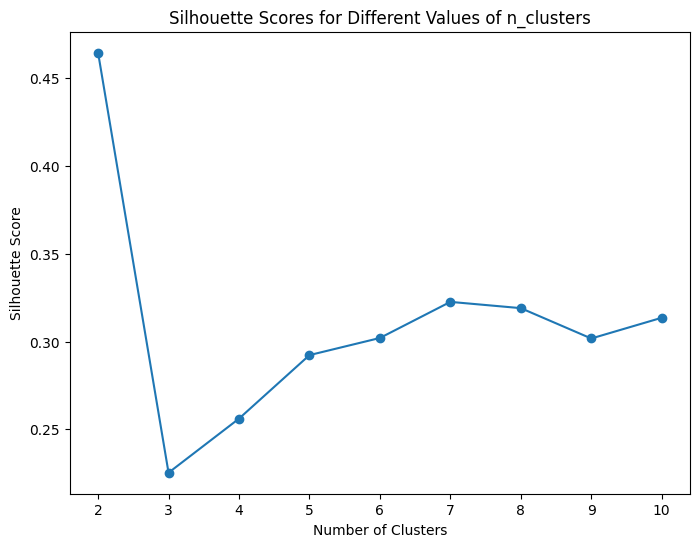

C:\Users\angsp\AppData\Local\Temp\ipykernel_3544\2242967002.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation['Cluster'] = hc.fit_predict(df_segmentation)
C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


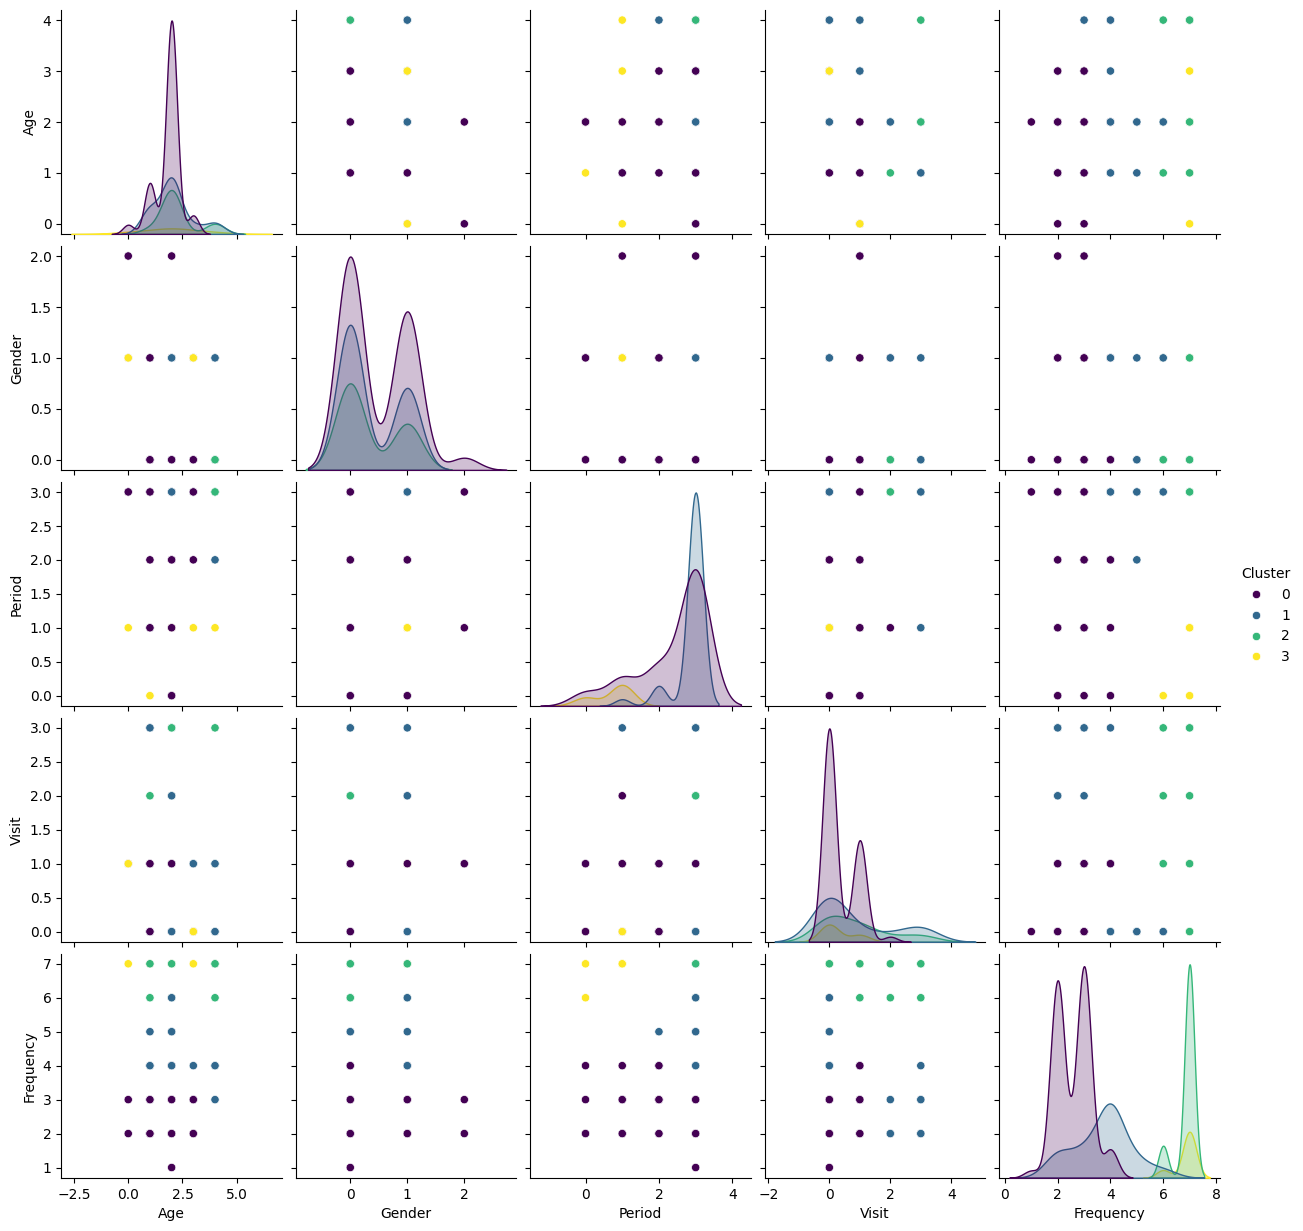

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

df_segmentation = df[['Age', 'Gender', 'Period', 'Visit', 'Frequency']]

# Create the linkage matrix
linkage_matrix = sch.linkage(df_segmentation, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

sil_scores = []

for n_clusters in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    df_segmentation['Cluster'] = hc.fit_predict(df_segmentation)

    score = silhouette_score(df_segmentation[['Age', 'Gender', 'Period', 'Visit', 'Frequency']], df_segmentation['Cluster'])
    sil_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for Different Values of n_clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_n_clusters = np.argmax(sil_scores) + 2  # Add 2 because we started from 2 clusters}")

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_segmentation['Cluster'] = hc.fit_predict(df_segmentation)

sns.pairplot(df_segmentation, hue='Cluster', palette='viridis')
plt.show()

Cluster 0:

Young, frequent female visitors (18-25 years) who visit mainly during Oct to Dec and at Opening Time.
Action: Target them with loyalty programs, exclusive event access, and VIP passes to maintain their engagement and frequent visits.

Cluster 1:

Young female visitors (18-25 years), with a small portion in the 26-35 range, visiting frequently and at varied times.
Action: Offer personalized promotions, discounts for repeat visits, and events during preferred periods to keep them engaged.

Cluster 2:

Female visitors (26-45 years), with lower frequency of visits, preferring Oct to Dec but with more flexibility in visit times.
Action: Introduce seasonal promotions, group offers, and exclusive discounts to convert them into more frequent visitors.

Cluster 3:

Middle-aged female visitors (26-45 years), visiting infrequently but still preferring Oct to Dec for their visits.
Action: Consider offering re-engagement promotions, special packages, or VIP treatment for their infrequent visits, encouraging them to return more often.

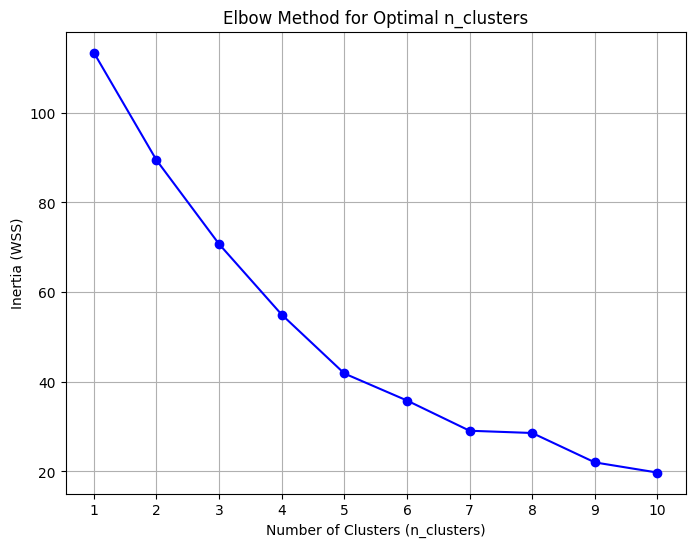

Cluster
1    38
2    27
4    25
3    22
0    17
Name: count, dtype: int64


C:\Users\angsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


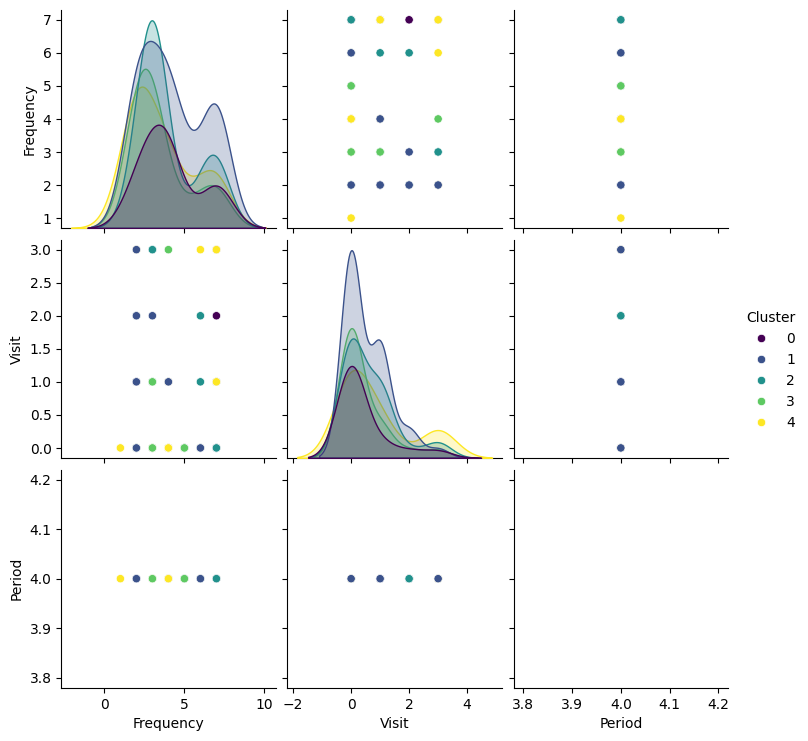

         Long waiting times  Difficulty navigating the park  \
Cluster                                                       
0                  0.764706                        1.000000   
1                  1.000000                        0.236842   
2                  1.000000                        0.296296   
3                  0.863636                        0.227273   
4                  0.960000                        0.000000   

         Poor crowd management  \
Cluster                          
0                          0.0   
1                          0.0   
2                          1.0   
3                          1.0   
4                          0.0   

         Lack of real time information about waiting times  Poor reception  
Cluster                                                                     
0                                                 0.235294        0.235294  
1                                                 1.000000        0.078947  
2          

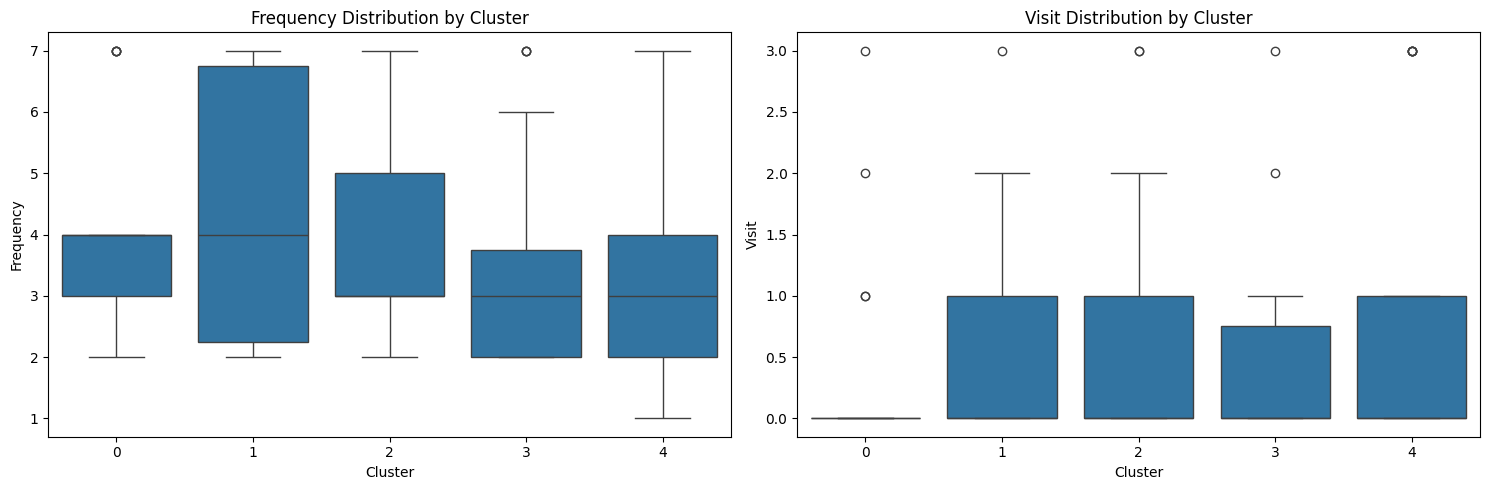

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

pain_points = ['Long waiting times', 'Difficulty navigating the park', 
               'Poor crowd management', 'Lack of real time information about waiting times', 
               'Poor reception']

df_pain_points = df[pain_points]

inertia = []
n_clusters_range = range(1, 11)

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_pain_points)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal n_clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Inertia (WSS)')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42) #n=5 based on elbow
df['Cluster'] = kmeans.fit_predict(df_pain_points)
print(df['Cluster'].value_counts())


sns.pairplot(df, hue='Cluster', palette='viridis', vars=['Frequency', 'Visit', 'Period'])
plt.show()

cluster_means = df.groupby('Cluster')[pain_points].mean()
print(cluster_means)

# Visualize the distribution of each feature (e.g., Frequency, Visit) across clusters
plt.figure(figsize=(15, 5))

# Plot Frequency by Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Frequency', data=df)
plt.title('Frequency Distribution by Cluster')

# Plot Visit by Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Visit', data=df)
plt.title('Visit Distribution by Cluster')

plt.tight_layout()
plt.show()

Cluster 0 – Low Frequency & Visit:

Pain Points: High in Long waiting times and Difficulty navigating the park.
Behavior: Visitors in this cluster frequent the park less and may be bothered by pain points, leading to low engagement (both in terms of frequency and visits).
Action: Focus on improving visitor experience, especially related to waiting times and navigation. Consider offering faster lines or better park management to reduce these pain points.

Cluster 1 – High Frequency, Moderate Visit:

Pain Points: Moderate levels of difficulty navigating the park and long waiting times.
Behavior: These visitors visit frequently but do not have extreme frequency. Their visit times are more varied, which might indicate flexible schedules or longer visits during less crowded times.
Action: To keep them engaged, offer early-bird promotions, VIP access to avoid long waits, or provide personalized experiences that cater to different visit times.
Cluster 2 (Blue) – Moderate Frequency & Visit:

Pain Points: Moderate Long waiting times and Poor crowd management.
Behavior: These visitors are moderately frequent and have a more balanced visit schedule. Their moderate pain point scores suggest tolerable dissatisfaction with the park experience.
Action: Improve crowd management and reduce waiting times to enhance their experience and increase visit frequency.

Cluster 3 – Low Frequency, High Visit:

Pain Points: Moderate pain in Long waiting times, Poor crowd management, and Lack of real-time info.
Behavior: Visitors in this cluster visit the park less frequently, but when they do, they might visit during high-traffic times or need better information.
Action: Offer information about waiting times and crowd distribution through apps or real-time displays. This could improve overall satisfaction and possibly increase their frequency of visits.

Cluster 4  – Low Frequency, Moderate Visit:

Pain Points: High Long waiting times and Poor reception.
Behavior: These visitors visit rarely, possibly due to negative experiences like poor reception or long waiting times.
Action: Focus on reducing wait times, providing better customer service, and offering discounts or incentives to bring these visitors back more often.

Insights:

Cluster 0 and Cluster 4 seem to be the ones most affected by pain points (specifically long waiting times), and they are likely to be less frequent visitors. Targeting them with VIP experiences or time-sensitive promotions could improve their experience and bring them back more often.
Cluster 1 shows high frequency but with a wide range of visit times. Offering special deals or exclusive access might attract these visitors more frequently, especially during non-peak hours.
Cluster 2 has moderate pain points and moderate frequency, so a focus on improving crowd management and reducing waiting times would likely result in higher satisfaction and more visits.